#UE 3.4 - TP n°1 - Mesure de la résolution spatiale (Siemens ProSpecta3)

In [3]:
#Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [4]:
#Fonction gaussienne pour ajustement
def gaussian(x, A, mu, sigma):
    return A * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

**Parties 1 et 2 - Résolution spatiale**

In [5]:
#Liste des fichiers Excel - Données
files = {
    "Partie1_x": "partie1_x.xlsx",
    "Partie1_y": "partie1_y.xlsx",
    "Partie2_a1": "partie2_a1.xlsx",
    "Partie2_a3": "partie2_a3.xlsx",
    "Partie2_a4": "partie2_a4.xlsx",
    "Partie2_a5": "partie2_a5.xlsx",
    "Partie2_b1": "partie2_b1.xlsx",
    "Partie2_b2": "partie2_b2.xlsx",
    "Partie2_b3": "partie2_b3.xlsx",
    "Partie2_b4": "partie2_b4.xlsx"
}

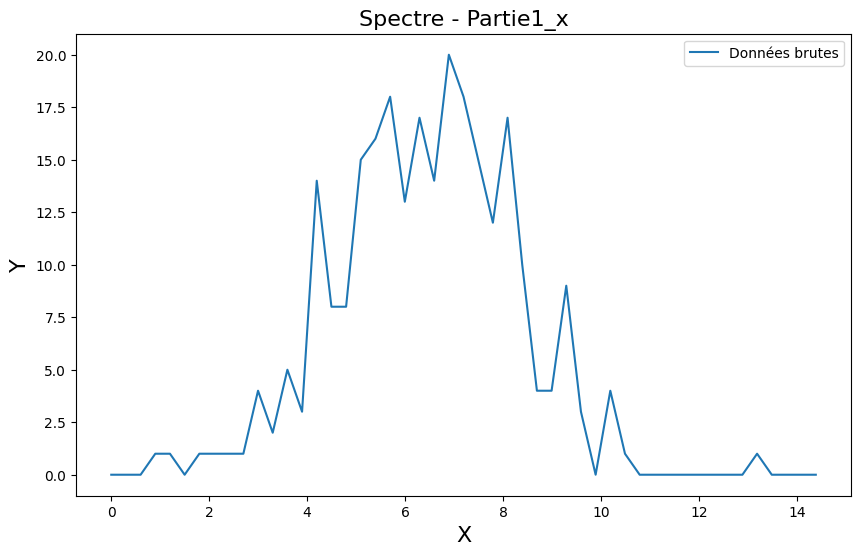

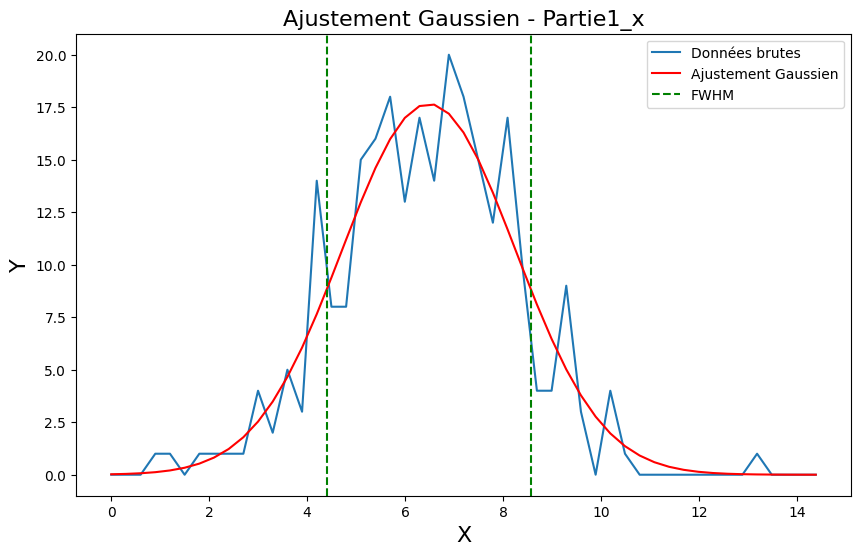

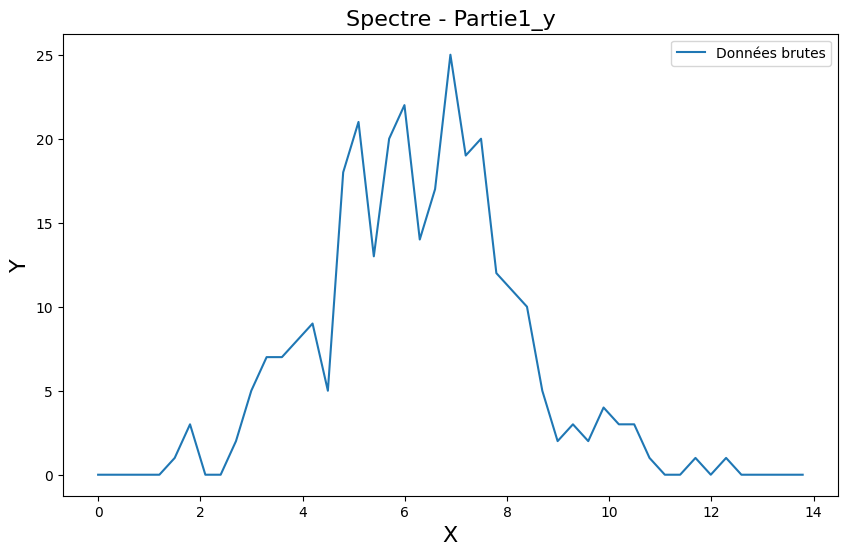

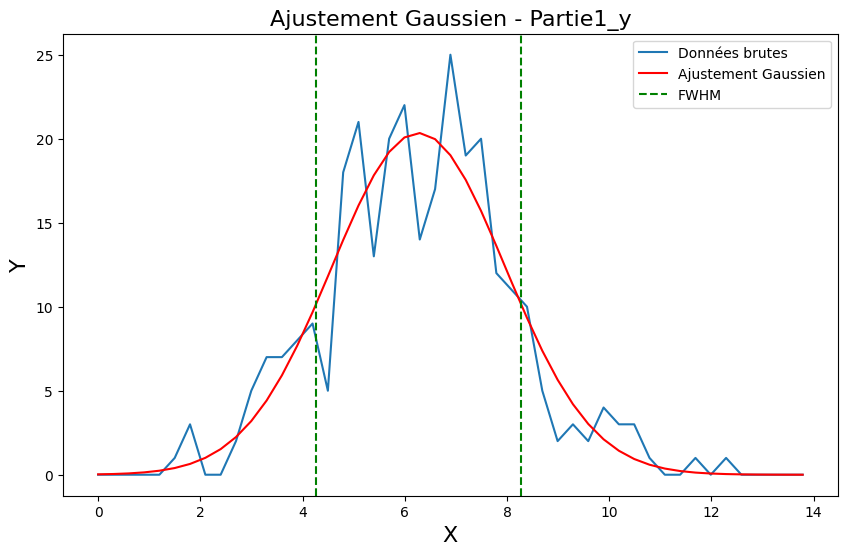

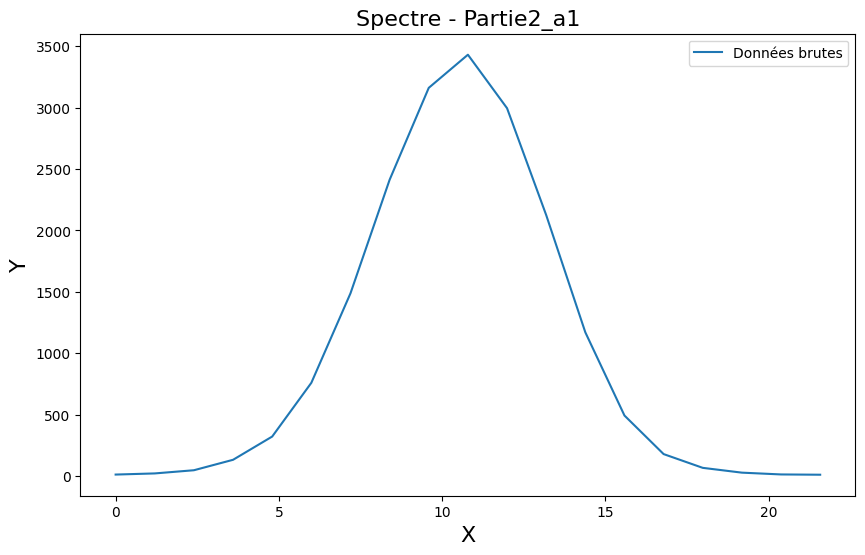

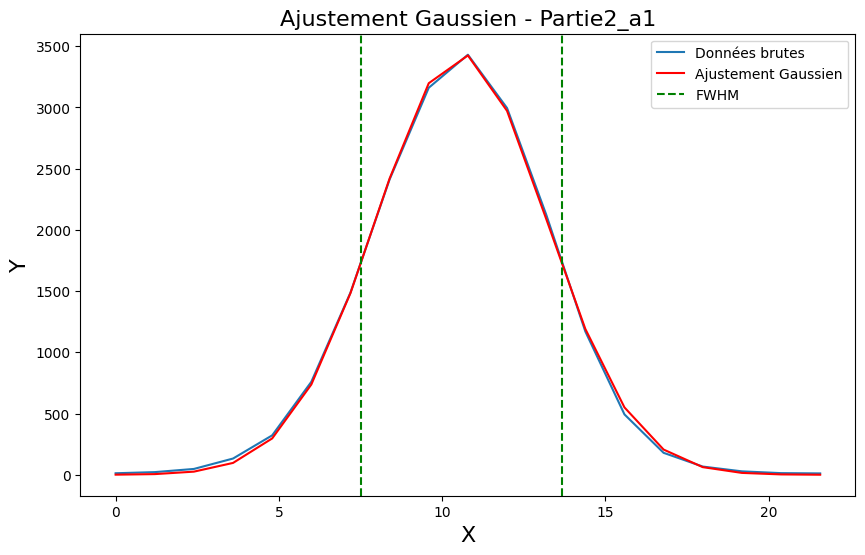

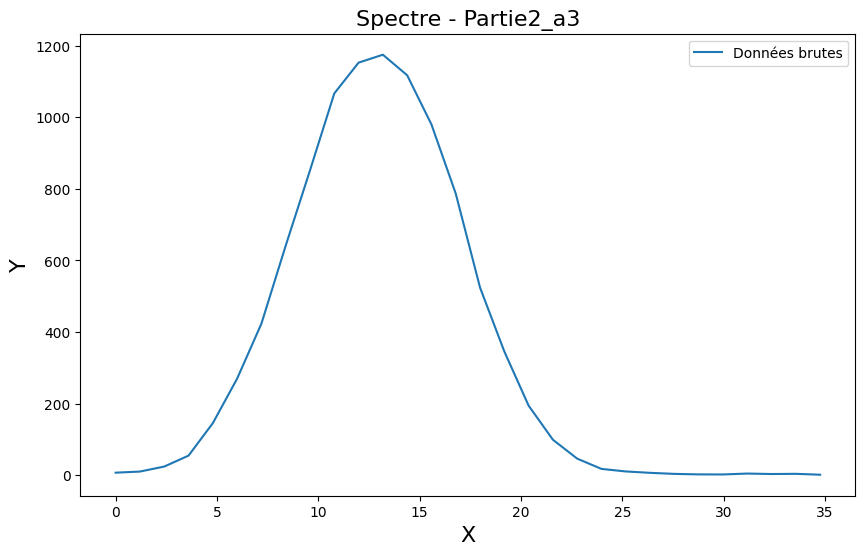

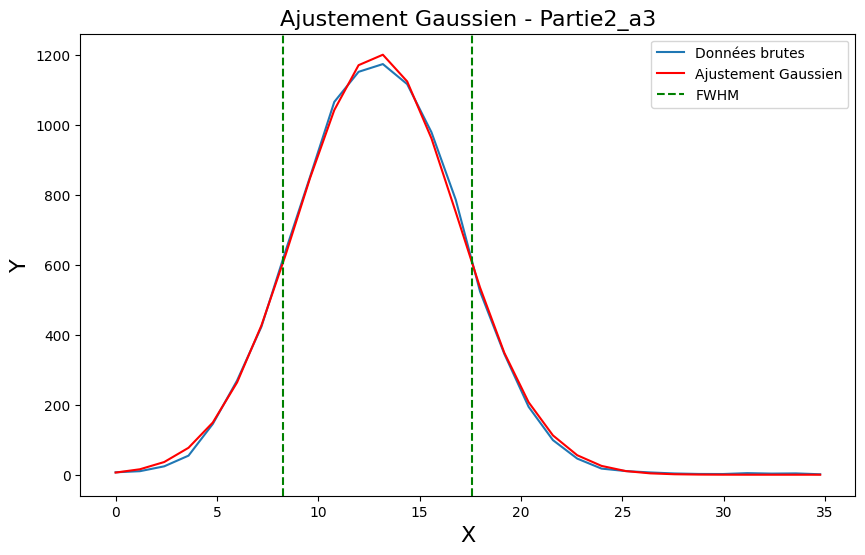

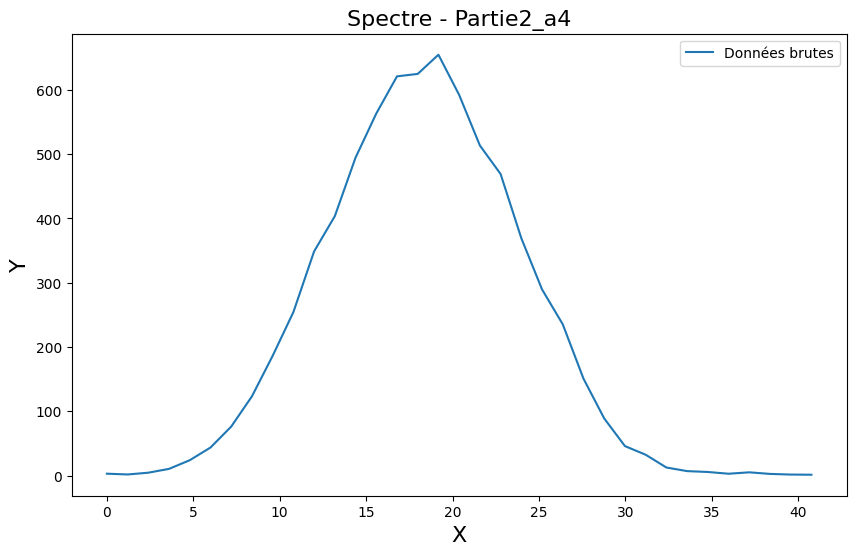

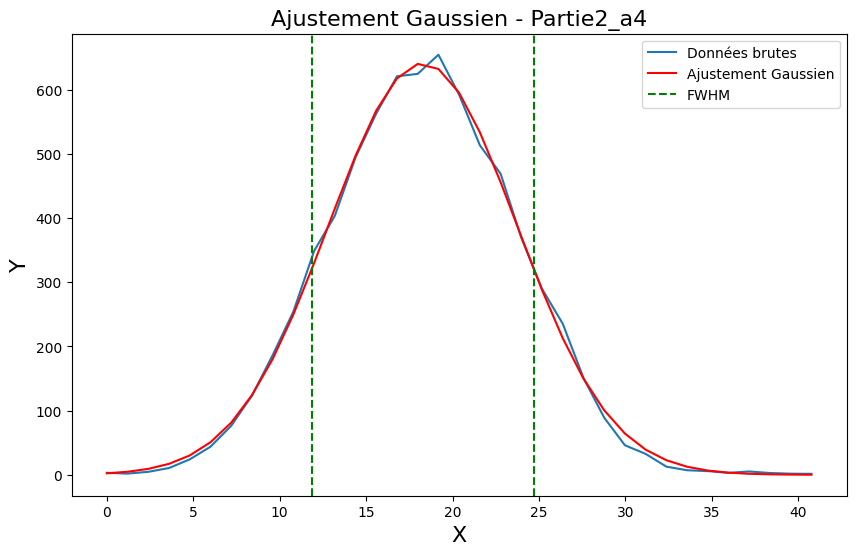

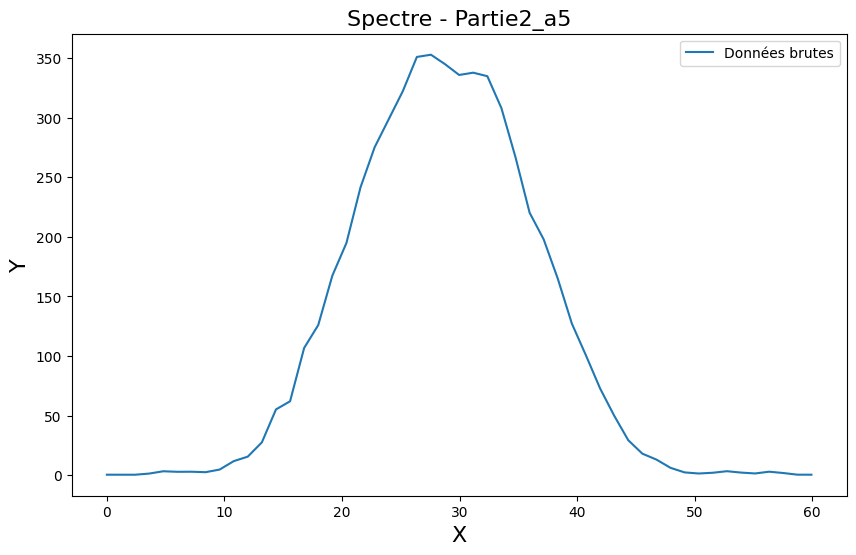

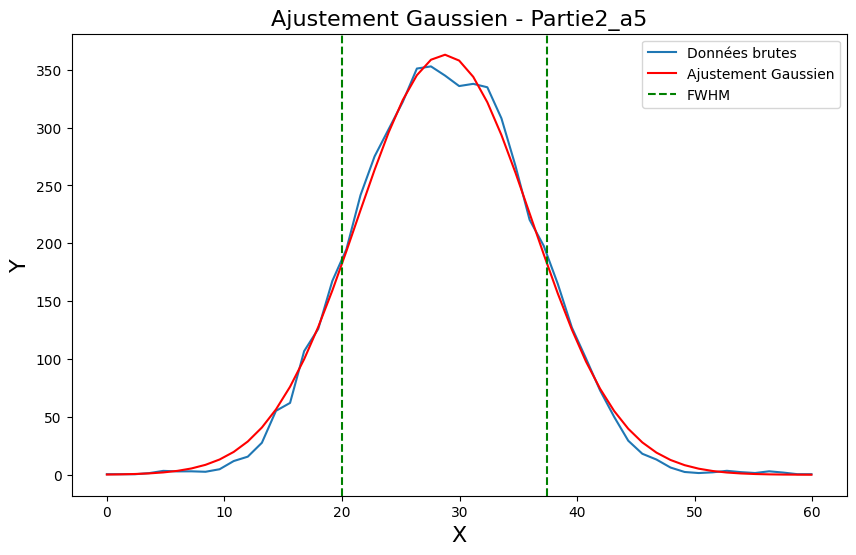

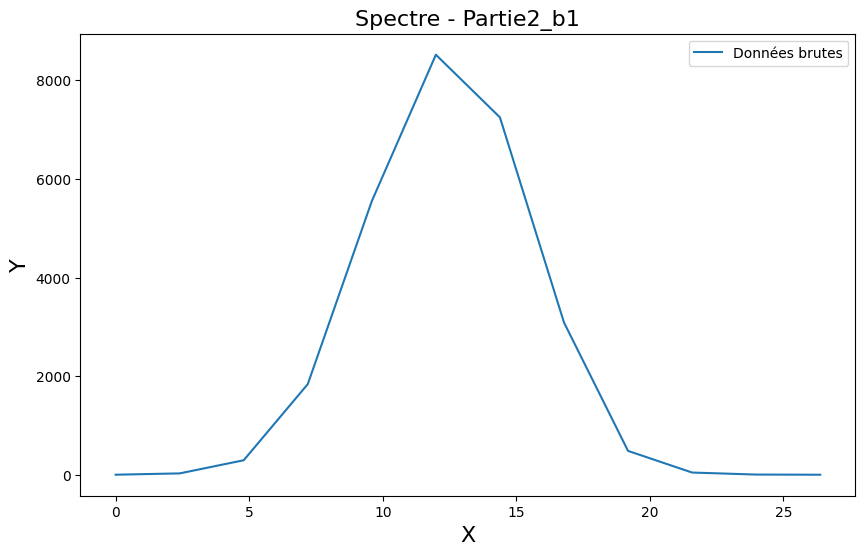

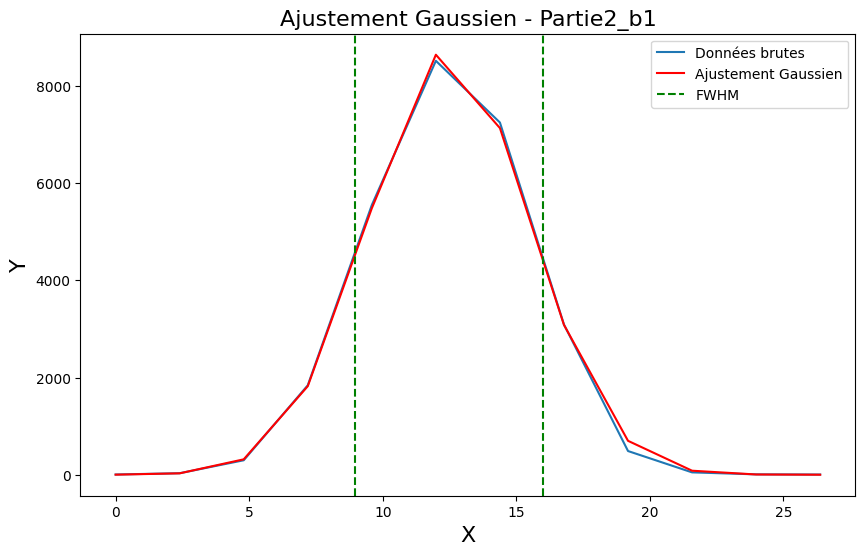

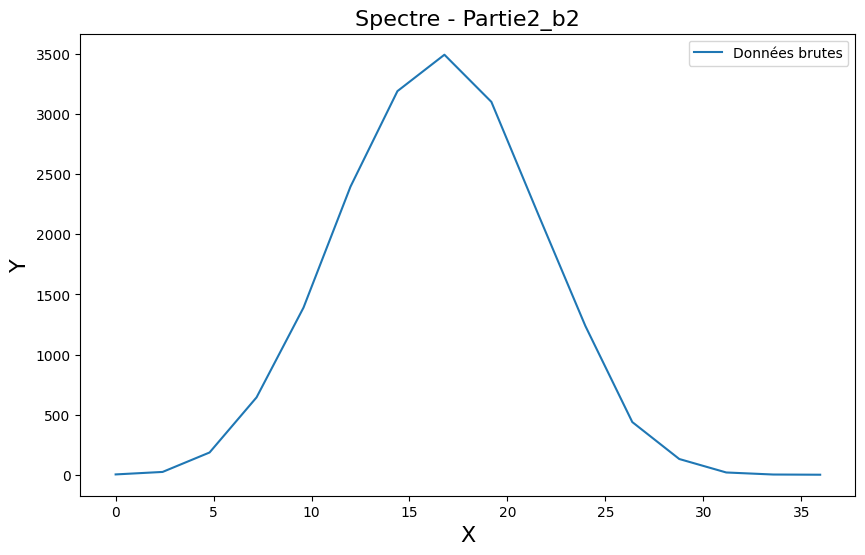

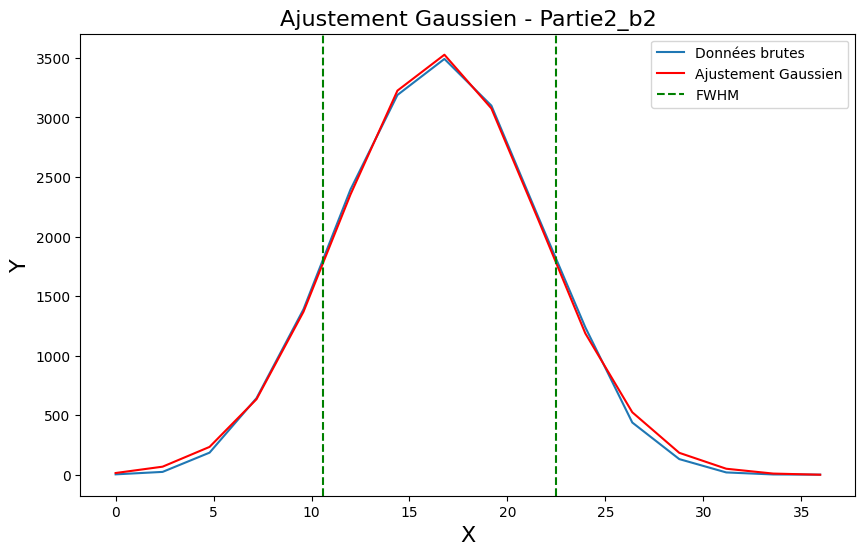

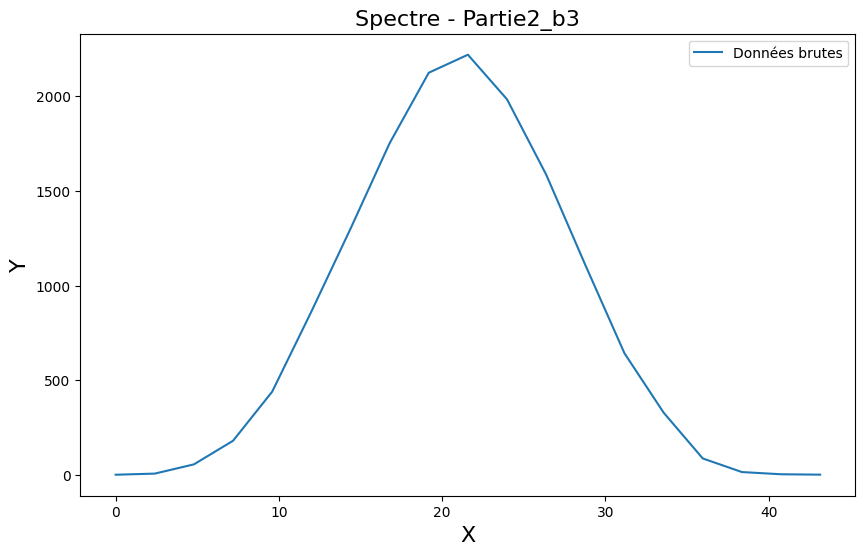

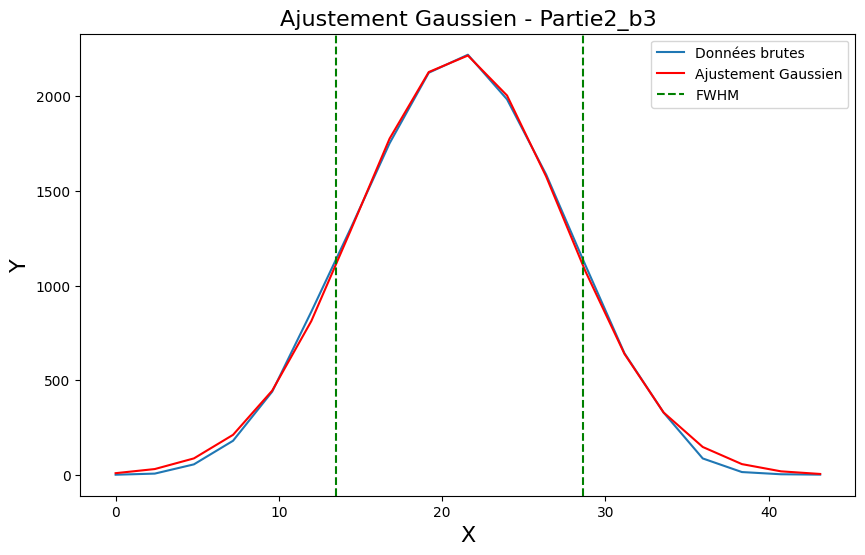

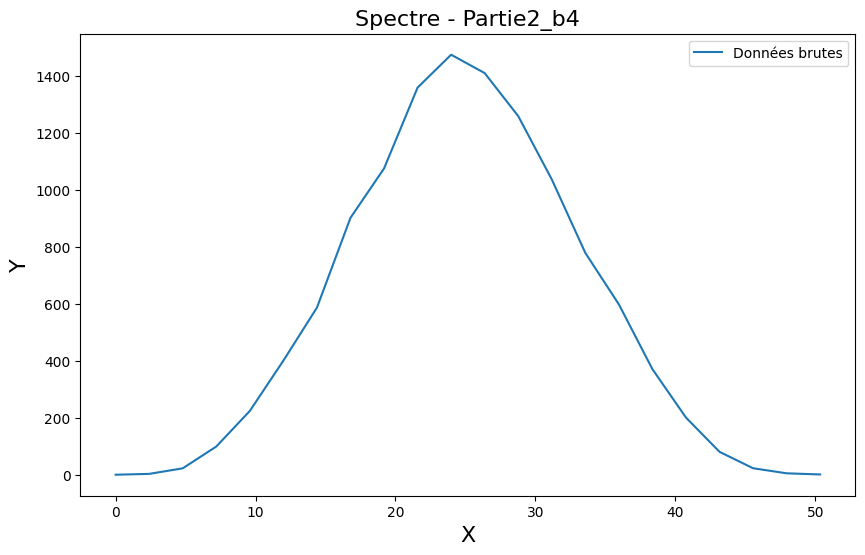

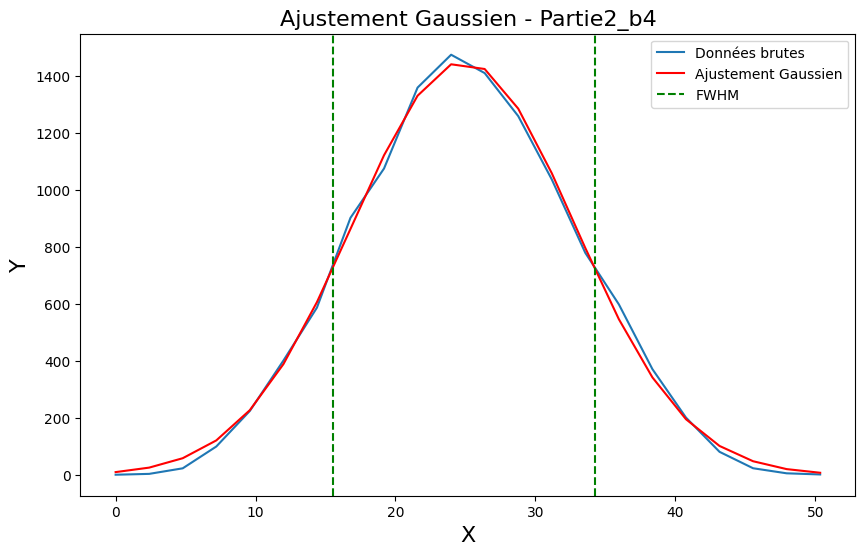

Résultats finaux :
Partie1_x: Centre = 6.48, FWHM = 4.17 mm
Partie1_y: Centre = 6.27, FWHM = 4.01 mm
Partie2_a1: Centre = 10.58, FWHM = 6.16 mm
Partie2_a3: Centre = 12.92, FWHM = 9.36 mm
Partie2_a4: Centre = 18.27, FWHM = 12.84 mm
Partie2_a5: Centre = 28.72, FWHM = 17.51 mm
Partie2_b1: Centre = 12.48, FWHM = 7.02 mm
Partie2_b2: Centre = 16.53, FWHM = 11.88 mm
Partie2_b3: Centre = 21.07, FWHM = 15.08 mm
Partie2_b4: Centre = 24.87, FWHM = 18.71 mm


In [6]:
#Dictionnaire pour stocker les résultats
results = {}

#Analyse pour chaque fichier
for key, file in files.items():
    data = pd.read_excel(file)
    distance = data['X']
    niveau_pixel = data['Y']

    #Affichage initial des données
    plt.figure(figsize=(10, 6))
    plt.plot(distance, niveau_pixel, label="Données brutes")
    plt.xlabel("X", fontsize=16)
    plt.ylabel("Y", fontsize=16)
    plt.title(f"Spectre - {key}", fontsize=16)
    plt.legend()
    plt.show()

    #Ajustement des données avec une fonction gaussienne
    popt, pcov = curve_fit(gaussian, distance, niveau_pixel, p0=[np.max(niveau_pixel), distance[np.argmax(niveau_pixel)], 1])
    A, mu, sigma = popt

    #Calcul de la largeur à mi-hauteur (FWHM)
    FWHM = 2.355 * sigma

    #Stockage des résultats
    results[key] = {"Centre": mu, "FWHM": FWHM}

    #Affichage du spectre avec l'ajustement
    plt.figure(figsize=(10, 6))
    plt.plot(distance, niveau_pixel, label="Données brutes")
    plt.plot(distance, gaussian(distance, *popt), color='red', label="Ajustement Gaussien")
    plt.axvline(mu - FWHM / 2, color='green', linestyle='--', label="FWHM")
    plt.axvline(mu + FWHM / 2, color='green', linestyle='--')
    plt.xlabel("X", fontsize=16)
    plt.ylabel("Y", fontsize=16)
    plt.title(f"Ajustement Gaussien - {key}", fontsize=16)
    plt.legend()
    plt.show()

#Affichage des résultats - Résolution spatiale
print("Résultats finaux :")
for key, res in results.items():
    print(f"{key}: Centre = {res['Centre']:.2f}, FWHM = {res['FWHM']:.2f} mm")

**Partie 3 - Résolution en énergie**

In [8]:
#Liste des fichiers Excel - Données
files_Re = {
    "Re_det1": "partie3_resolution_energie_det1_prospecta3.xlsx",
    "Re_det2": "partie3_resolution_energie_det2_prospecta3.xlsx"
}

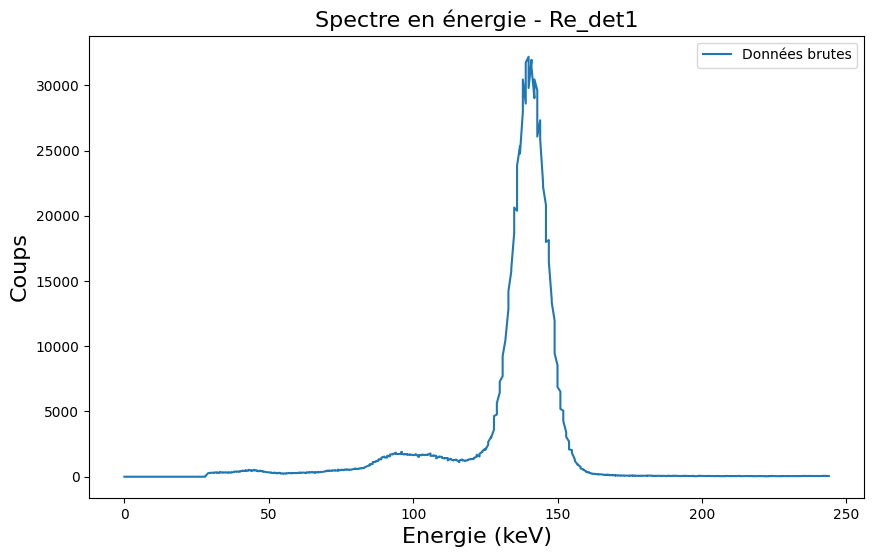

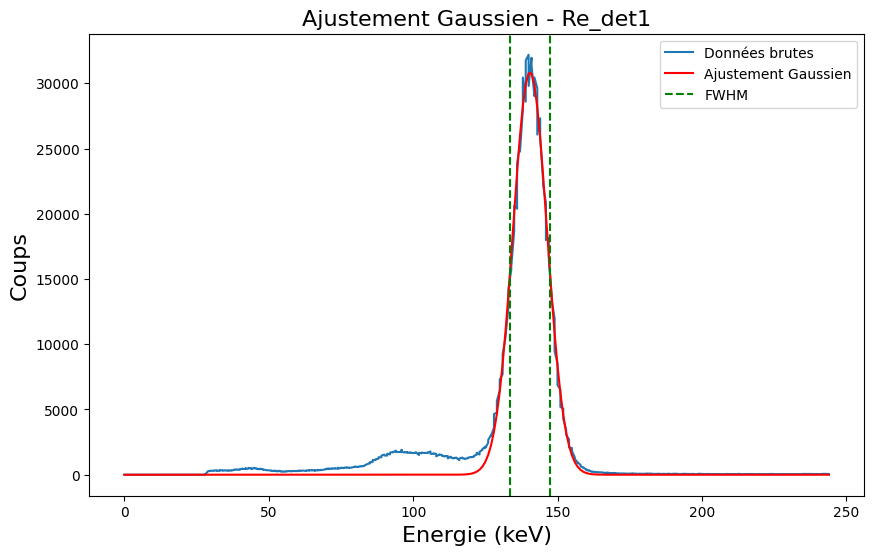

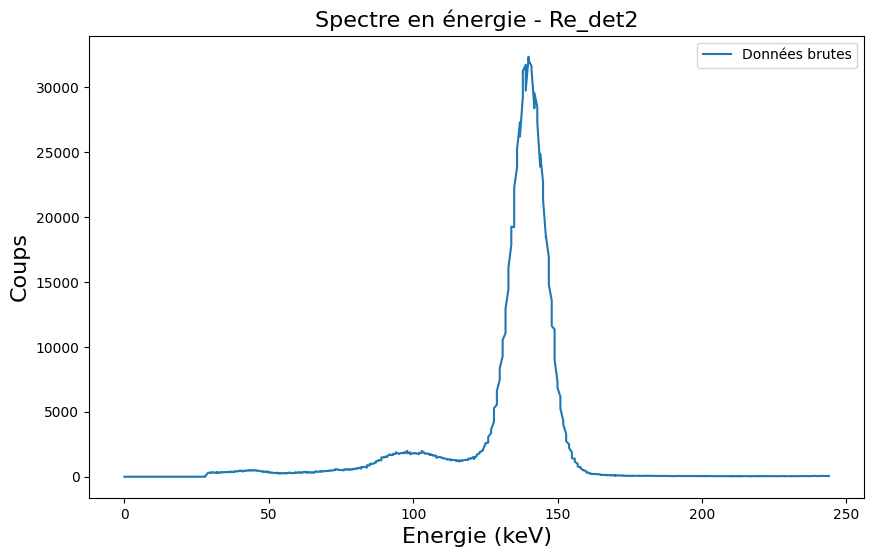

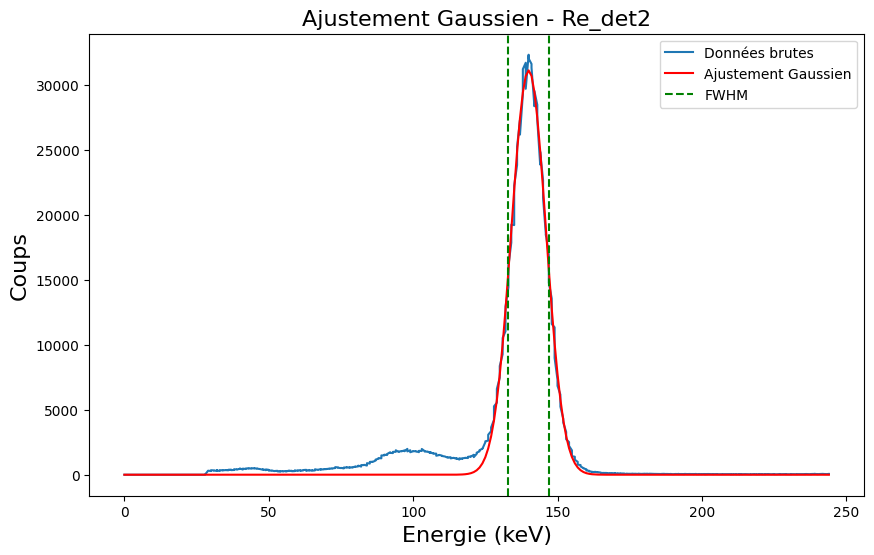

Résultats finaux :
Re_det1: Centre = 140.47, FWHM = 13.88 keV
Re_det2: Centre = 140.01, FWHM = 14.11 keV


In [9]:
#Dictionnaire pour stocker les résultats
results_Re = {}

#Analyse pour chaque fichier
for key, file in files_Re.items():
    data_Re = pd.read_excel(file)
    energie_Re = data_Re['Energie']
    coups_Re = data_Re['Coups']

    #Affichage initial des données
    plt.figure(figsize=(10, 6))
    plt.plot(energie_Re, coups_Re, label="Données brutes")
    plt.xlabel("Energie (keV)", fontsize=16)
    plt.ylabel("Coups", fontsize=16)
    plt.title(f"Spectre en énergie - {key}", fontsize=16)
    plt.legend()
    plt.show()

    #Ajustement des données avec une fonction gaussienne
    popt_Re, pcov_Re = curve_fit(gaussian, energie_Re, coups_Re, p0=[np.max(coups_Re), energie_Re[np.argmax(coups_Re)], 1])
    A_Re, mu_Re, sigma_Re = popt_Re

    #Calcul de la largeur à mi-hauteur (FWHM)
    FWHM_Re = 2.355 * sigma_Re

    #Stockage des résultats
    results_Re[key] = {"Centre": mu_Re, "FWHM": FWHM_Re}

    #Affichage du spectre avec l'ajustement
    plt.figure(figsize=(10, 6))
    plt.plot(energie_Re, coups_Re, label="Données brutes")
    plt.plot(energie_Re, gaussian(energie_Re, *popt_Re), color='red', label="Ajustement Gaussien")
    plt.axvline(mu_Re - FWHM_Re / 2, color='green', linestyle='--', label="FWHM")
    plt.axvline(mu_Re + FWHM_Re / 2, color='green', linestyle='--')
    plt.xlabel("Energie (keV)", fontsize=16)
    plt.ylabel("Coups", fontsize=16)
    plt.title(f"Ajustement Gaussien - {key}", fontsize=16)
    plt.legend()
    plt.show()

#Affichage des résultats - Résolution en énergie
print("Résultats finaux :")
for key, res in results_Re.items():
    print(f"{key}: Centre = {res['Centre']:.2f}, FWHM = {res['FWHM']:.2f}", "keV")